<a href="https://colab.research.google.com/github/dalgual/aidatasci/blob/main/opentable_sentiment_helpful.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch
!pip install tensorflow

In [ ]:
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 9.6 MB/s eta 0:00:00


In [ ]:
!pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.1 MB/s eta 0:00:00


In [ ]:
import torch
torch.cuda.is_available()

False

In [ ]:
!pip install datasets transformers huggingface_hub


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.5 MB/s eta 0:00:00


In [ ]:
# !apt-get install git-lfs


In [ ]:
from huggingface_hub import notebook_login
notebook_login()


In [ ]:
import pandas as pd

data_files = "https://raw.githubusercontent.com/dalgual/aidatasci/master/data/classification/opentable_review.csv"
#pd.options.display.max_rows = 9 #999

df = pd.read_csv(data_files) #'data.csv')

#print(df)

In [ ]:
# Drop null data
df = df.dropna(subset=['content'])

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46349 entries, 0 to 46391
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  46349 non-null  int64 
 1   nick        46349 non-null  object
 2   score       46349 non-null  int64 
 3   content     46349 non-null  object
 4   date        46349 non-null  object
 5   helpful     46349 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 2.5+ MB


In [ ]:
df

,Unnamed: 0,nick,score,content,date,helpful
0,45435,A Google user,5,I just found and reserved a table for dinner t...,2009-09-14 17:21:18,0
1,45541,A Google user,3,Good start takes up too much space and leaves ...,2009-09-14 21:00:11,0
2,45925,A Google user,5,Koo app . Very useable,2009-09-15 3:28:32,0
3,45446,A Google user,4,"Awesome, just waaaaaayyyyy too big for this ki...",2009-09-15 15:43:21,0
4,45398,A Google user,5,I luv that OpenTable is so responsive to reque...,2009-09-15 17:38:47,0
...,...,...,...,...,...,...
46387,526,Stephanie Magathan-Droubay,5,Makes reservations fast and easy,2023-01-15 22:23:49,0
46388,170,Kent Weber,4,Very useful app when exploring a new area. Jus...,2023-01-15 23:57:52,0
46389,3525,Tim Bolognone,5,Easy to use.,2023-01-16 1:02:59,0
46390,238,Neil Stout,4,Easy to determine availability and to book a r...,2023-01-16 2:36:28,0


In [ ]:
df_chart = pd.DataFrame(df, columns = ['helpful'])
df_chart
#df['helpful']

,helpful
0,0
1,0
2,0
3,0
4,0
...,...
46387,0
46388,0
46389,0
46390,0


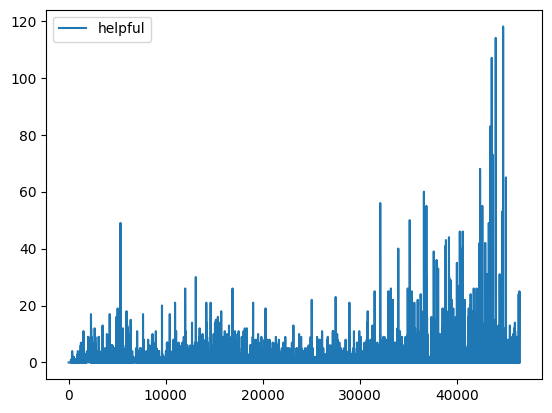

In [ ]:
import matplotlib.pyplot as plt

df_chart.plot()
plt.show()
#Two  lines to make our compiler able to draw:



In [ ]:
print("max: ", df_chart.max(), "\naverage: ", df_chart.mean(axis=0))

max:  helpful    118
dtype: int64 
average:  helpful    0.33703
dtype: float64


In [ ]:
df_chart.describe()

,helpful
count,46349.000000
mean,0.337030
std,2.059476
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,118.000000


In [ ]:
import numpy as np

#define conditions
conditions = [
    df['helpful']==0,
    df['helpful']>0
]
'''conditions = [
    df['helpful']<5,
    df['helpful']>=5
]'''

#define results
results = [0, 1]

#create new column based on conditions in column1 and column2
df['labels'] = np.select(conditions, results)


In [ ]:
df0 = df[df['labels'] == 0]

In [ ]:
df1 = df[df['labels'] == 1]

In [ ]:
df0 = df0.sample(frac = 0.15, random_state = 200)

In [ ]:
df = df0.append(df1, ignore_index=True, sort=True)

<ipython-input-61-71e976dca0cf>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df0.append(df1, ignore_index=True, sort=True)


In [ ]:
df[df['labels'] == 1]

,Unnamed: 0,content,date,helpful,labels,nick,score
6048,45693,"Cool app., needs better search capabilities. ....",2010-05-18 2:09:24,1,1,A Google user,5
6049,44832,Love Open Table and this is a good app. Add th...,2010-06-30 2:24:48,1,1,A Google user,4
6050,44664,Great idea. Booked a reservation for my annive...,2010-08-12 17:47:12,1,1,A Google user,5
6051,44542,The menu doesn't scroll correctly on my HTC In...,2010-08-12 22:01:33,1,1,A Google user,3
6052,44537,"Very useful app, especially here in Las Vegas!",2010-08-15 3:07:12,1,1,A Google user,4
...,...,...,...,...,...,...,...
12075,3,This app has a lot of trouble identifying know...,2023-01-09 18:36:34,24,1,JT Sween,3
12076,14992,This app is *still* so full of fail. How is th...,2023-01-12 4:06:59,1,1,A Google user,1
12077,99,Great for finding and reserving restaurants al...,2023-01-13 23:12:02,1,1,Tim,4
12078,78,I would say is that most restaurants are vastl...,2023-01-14 20:51:14,3,1,D. Coven,3


In [ ]:
#df = df.sampleBy("labels", fractions={0: 0.15, 1: 1.0}) #fractions={0: 0.02, 1: 0.02})
df.describe()

,Unnamed: 0,helpful,labels,score
count,12080.000000,12080.000000,12080.000000,12080.000000
mean,22776.142798,1.293129,0.499338,4.284354
std,14644.259782,3.877918,0.500020,1.264120
min,2.000000,0.000000,0.000000,0.000000
25%,8765.000000,0.000000,0.000000,4.000000
50%,23789.500000,0.000000,0.000000,5.000000
75%,35822.000000,1.000000,1.000000,5.000000
max,46687.000000,118.000000,1.000000,5.000000


In [ ]:
from datasets import load_dataset
from datasets import Dataset

# dataset = load_dataset("csv", data_files=data_files, split="train")
dataset = Dataset.from_pandas(df)


In [ ]:
dataset

Dataset({
    features: ['Unnamed: 0', 'content', 'date', 'helpful', 'labels', 'nick', 'score'],
    num_rows: 12080
})

In [ ]:
# https://discuss.huggingface.co/t/how-to-split-hugging-face-dataset-to-train-and-test/20885/3
train_ds=dataset.train_test_split(test_size=0.3, shuffle=True) #, stratify_by_column='Sentiment')
print(train_ds)

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'content', 'date', 'helpful', 'labels', 'nick', 'score'],
        num_rows: 8456
    })
    test: Dataset({
        features: ['Unnamed: 0', 'content', 'date', 'helpful', 'labels', 'nick', 'score'],
        num_rows: 3624
    })
})


In [ ]:
#train_ds = train_ds.rename_column("Sentiment", "labels")
train_ds = train_ds.rename_column("content", "text")
print(train_ds)

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'text', 'date', 'helpful', 'labels', 'nick', 'score'],
        num_rows: 8456
    })
    test: Dataset({
        features: ['Unnamed: 0', 'text', 'date', 'helpful', 'labels', 'nick', 'score'],
        num_rows: 3624
    })
})


In [ ]:
train_ds

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'text', 'date', 'helpful', 'labels', 'nick', 'score'],
        num_rows: 8456
    })
    test: Dataset({
        features: ['Unnamed: 0', 'text', 'date', 'helpful', 'labels', 'nick', 'score'],
        num_rows: 3624
    })
})

In [ ]:
small_train_dataset = train_ds["train"].shuffle(seed=42).select([i for i in list(range(8456))])
small_test_dataset = train_ds["test"].shuffle(seed=42).select([i for i in list(range(3624))])


In [ ]:
small_train_dataset

Dataset({
    features: ['Unnamed: 0', 'text', 'date', 'helpful', 'labels', 'nick', 'score'],
    num_rows: 8456
})

In [ ]:
small_test_dataset

Dataset({
    features: ['Unnamed: 0', 'text', 'date', 'helpful', 'labels', 'nick', 'score'],
    num_rows: 3624
})

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")


In [ ]:
def preprocess_function(examples):
   #return tokenizer(examples["SentimentText"], truncation=True)
   return tokenizer(examples["text"], truncation=True)

tokenized_train = small_train_dataset.map(preprocess_function, batched=True)
tokenized_test = small_test_dataset.map(preprocess_function, batched=True)


Map:   0%|          | 0/8456 [00:00<?, ? examples/s]

Map:   0%|          | 0/3624 [00:00<?, ? examples/s]

In [ ]:
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)


In [ ]:
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import numpy as np
from datasets import load_metric

def compute_metrics(eval_pred):
   load_accuracy = load_metric("accuracy")
   load_f1 = load_metric("f1")
   load_prec = load_metric("precision")
   load_recall = load_metric("recall")
   #load_auc = load_metric("roc_auc")

   logits, labels = eval_pred
   predictions = np.argmax(logits, axis=-1)
   accuracy = load_accuracy.compute(predictions=predictions, references=labels)["accuracy"]
   f1 = load_f1.compute(predictions=predictions, references=labels)["f1"]
   prec = load_prec.compute(predictions=predictions, references=labels)["precision"]
   recall = load_recall.compute(predictions=predictions, references=labels)["recall"]
   #auc = load_auc.compute(predictions=predictions, references=labels)["roc_auc"]

   #return {"roc_auc":auc, "accuracy": accuracy, "f1": f1, "precision":prec, "recall":recall}
   return {"accuracy": accuracy, "f1": f1, "precision":prec, "recall":recall}



In [ ]:
#!pip install accelerate -U

In [ ]:
#!pip install transformers[torch]

In [ ]:
from transformers import TrainingArguments, Trainer


#repo_name = "finetuning-sentiment-model-3000-samples-jwoo5"
repo_name = "semadalg/finetuning-opetable-model"

training_args = TrainingArguments(
   output_dir=repo_name,
   learning_rate=2e-5,
   per_device_train_batch_size=16,
   per_device_eval_batch_size=16,
   num_train_epochs=2,
   weight_decay=0.01,
   save_strategy="epoch",
   push_to_hub=True,
)




In [ ]:
trainer = Trainer(
   model=model,
   args=training_args,
   train_dataset=tokenized_train,
   eval_dataset=tokenized_test,
   tokenizer=tokenizer,
   data_collator=data_collator,
   compute_metrics=compute_metrics
)

In [ ]:
trainer.train()

You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
500,0.600000
1000,0.569000


TrainOutput(global_step=1058, training_loss=0.5819604563577865, metrics={'train_runtime': 7056.7454, 'train_samples_per_second': 2.397, 'train_steps_per_second': 0.15, 'total_flos': 326590092173952.0, 'train_loss': 0.5819604563577865, 'epoch': 2.0})

In [ ]:
trainer.evaluate()

<ipython-input-77-cac36c61a0be>:5: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  load_accuracy = load_metric("accuracy")


{'eval_loss': 0.5733002424240112,
 'eval_accuracy': 0.7050220750551877,
 'eval_f1': 0.7031380172174395,
 'eval_precision': 0.7116357504215851,
 'eval_recall': 0.6948408342480791,
 'eval_runtime': 493.0146,
 'eval_samples_per_second': 7.351,
 'eval_steps_per_second': 0.46,
 'epoch': 2.0}

In [ ]:
!pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 1.9 MB/s eta 0:00:00


In [ ]:
predictions = trainer.predict(tokenized_test) #tokenized_train) #
print(predictions.predictions.shape, predictions.label_ids.shape)

(3624, 2) (3624,)


In [ ]:
predictions

PredictionOutput(predictions=array([[-0.7694643 ,  0.7964201 ],
       [-0.827636  ,  0.9578364 ],
       [-1.1120737 ,  1.1873428 ],
       ...,
       [ 0.7214463 , -0.9373539 ],
       [ 0.8004055 , -1.0060077 ],
       [ 0.00938289, -0.25335112]], dtype=float32), label_ids=array([1, 1, 1, ..., 0, 0, 1]), metrics={'test_loss': 0.5733002424240112, 'test_accuracy': 0.7050220750551877, 'test_f1': 0.7031380172174395, 'test_precision': 0.7116357504215851, 'test_recall': 0.6948408342480791, 'test_runtime': 515.8126, 'test_samples_per_second': 7.026, 'test_steps_per_second': 0.44})

In [ ]:
import evaluate

roc_auc_score = evaluate.load("roc_auc")


In [ ]:
# predictions=predictions, references=labels)["roc_auc"]
results = roc_auc_score.compute(prediction_scores=preds, references=predictions.label_ids) #references="labels", prediction_scores=predictions)
print(round(results['roc_auc'], 6))

0.705079


In [ ]:
results

{'roc_auc': 0.7050785747267033}

In [ ]:
accuracy = evaluate.load("accuracy")
accuracy.description

'\nAccuracy is the proportion of correct predictions among the total number of cases processed. It can be computed with:\nAccuracy = (TP + TN) / (TP + TN + FP + FN)\n Where:\nTP: True positive\nTN: True negative\nFP: False positive\nFN: False negative\n'

In [ ]:
#acc = accuracy.compute(prediction_scores=preds, references=predictions.label_ids) #references="labels", prediction_scores=predictions)
#print(round(acc['accuracy'], 6))
# TypeError: object of type 'NoneType' has no len()

In [ ]:
#clf_metrics = evaluate.combine(["roc_auc", "accuracy", "f1", "precision", "recall"])
clf_metrics = evaluate.load("glue", "mrpc")

In [ ]:
preds = np.argmax(predictions.predictions, axis=-1)

In [ ]:
clf_metrics.compute(predictions=preds, references=predictions.label_ids)


{'accuracy': 0.7050220750551877, 'f1': 0.7031380172174395}

In [ ]:
trainer.push_to_hub()


'https://huggingface.co/semadalg/finetuning-opetable-model/tree/main/'

In [ ]:
from transformers import pipeline

sentiment_model = pipeline(model="semadalg/finetuning-opetable-model")
sentiment_model(["I love this move", "This movie sucks!"])


[{'label': 'LABEL_0', 'score': 0.8266034126281738},
 {'label': 'LABEL_0', 'score': 0.5933412909507751}]

In [ ]:
#import evaluate

metric = evaluate.load("glue", "mrpc")
metric.compute(predictions=preds, references=predictions.label_ids) #, zero_division=0)

{'accuracy': 0.7050220750551877, 'f1': 0.7031380172174395}

## References
1. Getting Started with Sentiment Analysis using Python, https://huggingface.co/blog/sentiment-analysis-python
1. The model did not return a loss from the inputs, only the following keys: logits, https://discuss.huggingface.co/t/the-model-did-not-return-a-loss-from-the-inputs-only-the-following-keys-logits-for-reference-the-inputs-it-received-are-input-values/25420/3
1. Choosing a metric for your task, https://huggingface.co/docs/evaluate/choosing_a_metric
1. Metric: rocauc, https://huggingface.co/spaces/evaluate-metric/roc_auc
1. Example with Evaluate, https://huggingface.co/learn/nlp-course/chapter3/3?fw=pt
1. DistilBERT model, https://huggingface.co/distilbert-base-uncased
1. Large Language Models: BERT — Bidirectional Encoder Representations from Transformer, https://towardsdatascience.com/bert-3d1bf880386a
1. Introduction to Large Language Models (LLMs): An Overview of BERT, GPT, and Other Popular Models, https://www.johnsnowlabs.com/introduction-to-large-language-models-llms-an-overview-of-bert-gpt-and-other-popular-models/
